In [1]:
import numpy as np 
import cv2 
from glob import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
# read data for training, testing and validation sets
mpath_train = glob('./Cropped_data/Train/Male/*.jpg')
fpath_train = glob('./Cropped_data/Train/Female/*.jpg')

mpath_test = glob('./Cropped_data/Test/Male/*.jpg')
fpath_test = glob('./Cropped_data/Test/Female/*.jpg')

mpath_val = glob('./Cropped_data/Validation/Male/*.jpg')
fpath_val = glob('./Cropped_data/Validation/Female/*.jpg')

### Structuring Data (pixels)

In [3]:
#building dataframe for training set
df_male = pd.DataFrame(mpath_train, columns=['fpath'])
df_male['gender'] = 'Male'
df_female = pd.DataFrame(fpath_train, columns=['fpath'])
df_female['gender'] = 'Female'

df_train = pd.concat([df_male, df_female],ignore_index=True, axis = 0)

#building dataframe for test set
df_male = pd.DataFrame(mpath_test, columns=['fpath'])
df_male['gender'] = 'Male'
df_female = pd.DataFrame(fpath_test, columns=['fpath'])
df_female['gender'] = 'Female'

df_test = pd.concat([df_male, df_female],ignore_index=True, axis = 0)

#building dataframe for validation set
df_male = pd.DataFrame(mpath_val, columns=['fpath'])
df_male['gender'] = 'Male'
df_female = pd.DataFrame(fpath_val, columns=['fpath'])
df_female['gender'] = 'Female'

df_val = pd.concat([df_male, df_female], ignore_index=True, axis = 0)

In [4]:
for i in [df_train, df_test, df_val]:
    i['dimension'] = i['fpath'].apply(lambda x: cv2.imread(x).shape[0])
    
dim = df_train['dimension'].tolist() + df_test['dimension'].tolist() + df_val['dimension'].tolist() 

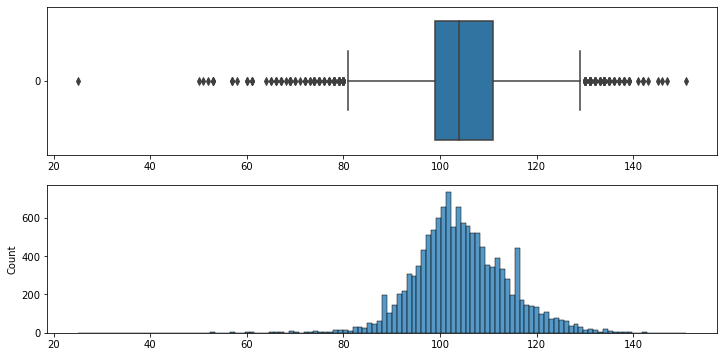

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.boxplot(data=dim, orient="h")
plt.subplot(2,1,2)
sns.histplot(data=dim)
plt.show()

In [6]:
# Only keep images of dimension >= 60
df_train = df_train[df_train['dimension'] >=60]
df_test = df_test[df_test['dimension'] >=60]
df_val = df_val[df_val['dimension'] >=60]

In [7]:
# Resize all images to 100x100
path = df_train['fpath'][0]
img = cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

if gray.shape[0] >= 100:
    gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA) # Shrink the image
else:
    gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # Enlarge the image
    
flatten = gray_resize.flatten()

flatten

array([ 13,  31,  27, ..., 120, 141, 145], dtype=uint8)

In [8]:
def structuring(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    if gray.shape[0] >= 100:
        gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA) # Shrink the image
    else:
        gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC) # Enlarge the image

    flatten = gray_resize.flatten()

    return flatten

In [9]:
for i in [df_train, df_test, df_val]:
    i['data'] = i['fpath'].apply(structuring)

In [10]:
# form 10,000 columns of pixels
data_train = df_train['data'].apply(pd.Series)
data_test = df_test['data'].apply(pd.Series)
data_val = df_val['data'].apply(pd.Series)

In [11]:
# Normalize pixels by dividing 255 and save as arrays (independent variables)
X_train = (data_train/255).to_numpy(dtype='float16')
X_test = (data_test/255).to_numpy(dtype='float16')
X_val = (data_val/255).to_numpy(dtype='float16')

In [12]:
# gender as dependent variables
y_train = np.where(df_train['gender'] == 'Male', 1, 0)
y_test = np.where(df_test['gender'] == 'Male', 1, 0)
y_val = np.where(df_val['gender'] == 'Male', 1, 0)

In [13]:
np.savez_compressed('./Cropped_data/data_X', train=X_train, test=X_test, val=X_val)

In [14]:
np.savez('./Cropped_data/data_y', train=y_train, test=y_test, val=y_val)